In [33]:
import os
import os.path as path

import h5py
import numpy as np

In [34]:
source_dir = 'augmentations/Level 4'
meta_dir = 'processed_augmentations'

try:
    os.listdir(meta_dir)
except:
    os.mkdir(meta_dir)
    
switch_dim = lambda x: np.rollaxis(x, -1, -2)
    
files = [i for i in os.listdir(source_dir) if i[-3:] == 'mat']
files

['ON_R.mat', 'ON_SR.mat']

In [35]:
for fname in files:
    data_dir = fname.split('.')[0]
    data_name = fname.split('.')[0]
    data_dir = path.join(meta_dir, data_dir)
    print(data_dir)
    try:
        os.listdir(data_dir)
    except:
        os.mkdir(data_dir)
    with h5py.File(path.join(source_dir, fname), 'r') as file:
        keys = list((file[data_name]['train']))
        for k in keys:
            print(k)
            data = file[data_name]['train'][k]
            data = switch_dim(np.array(data))
            print(data.shape)
            np.save(path.join(data_dir, 'train_{}_{}.npy'.format(k, data.shape[1])), data)

        keys = list((file[data_name]['test']))
        for k in keys:
            print(k)
            data = file[data_name]['test'][k]
            data = switch_dim(np.array(data))
            print(data.shape)
            np.save(path.join(data_dir, 'test_{}_{}.npy'.format(k, data.shape[1])), data)

processed_augmentations\ON_R
img
(893, 256, 256)
lumen
(893, 512, 512)
media
(893, 512, 512)
img
(58, 256, 256)
img_org
(58, 512, 512)
lumen
(58, 512, 512)
media
(58, 512, 512)
processed_augmentations\ON_SR
img
(8037, 256, 256)
lumen
(8037, 512, 512)
media
(8037, 512, 512)
img
(58, 256, 256)
img_org
(58, 512, 512)
lumen
(58, 512, 512)
media
(58, 512, 512)


In [28]:
data = np.load('./processed_augmentations/ON_S/train_img_256.npy')
lumen = np.load('./processed_augmentations/ON_S/train_lumen_512.npy')
media = np.load('./processed_augmentations/ON_S/train_media_512.npy')
data.shape

(171, 256, 256)

In [29]:
import matplotlib.pyplot as plt

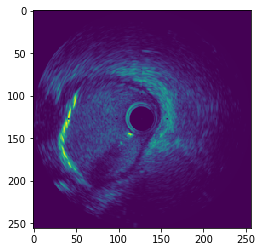

In [30]:
plt.imshow(data[0])

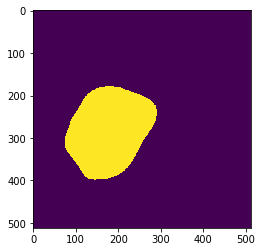

In [31]:
plt.imshow(lumen[0])

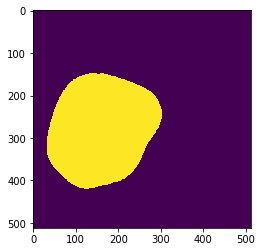

In [32]:
plt.imshow(media[0])